<a href="https://colab.research.google.com/github/J0SAL/Learning-DL/blob/main/codebasics/1_digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digits classification using neural network

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [40]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
len(X_train), len(y_train)

(60000, 60000)

In [14]:
len(X_test), len(y_test)

(10000, 10000)

In [17]:
X_train[0].shape
#be we need 1D array to be passed in the NN
# conversion will be done later

(28, 28)

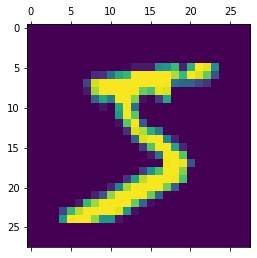

In [20]:
plt.matshow(X_train[0])

In [22]:
y_train[0]

5

In [41]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [42]:
# scaling the values
X_train = X_train / 255
X_test = X_test / 255

In [43]:
# converting to 1D
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [44]:
X_train.shape
#total record, rows, columns

(60000, 28, 28)

In [45]:
X_train_flattened.shape
# total records  = 60000, row = 784

(60000, 784)

In [46]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
# NN model
# no middle layer, only has input and output
# 10 - output neurons, input shape = input neurons
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4699 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2726 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9263


In [48]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9254


[0.2692320644855499, 0.9254000186920166]

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
# max value's index is the ans

array([2.5413662e-02, 3.1688182e-07, 5.2105784e-02, 9.6260345e-01,
       2.8030872e-03, 1.2242162e-01, 1.8688693e-06, 9.9985754e-01,
       9.5063001e-02, 7.0104122e-01], dtype=float32)

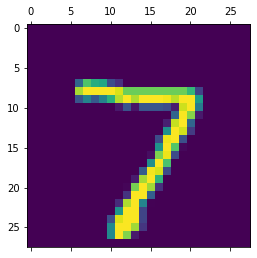

In [50]:
plt.matshow(X_test[0]) #input

In [52]:
np.argmax(y_predicted[0]) #get index of max 

7

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [55]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [58]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   8,    9,  915,   14,    8,    5,   13,   12,   45,    3],
       [   3,    0,   17,  914,    0,   28,    3,   12,   25,    8],
       [   1,    1,    2,    1,  909,    0,   13,    5,    9,   41],
       [   9,    3,    2,   25,   10,  778,   19,    7,   31,    8],
       [   9,    3,    5,    1,    7,    9,  919,    2,    3,    0],
       [   1,    5,   22,    7,    7,    0,    0,  956,    2,   28],
       [   8,    9,    7,   15,    9,   23,   10,   13,  873,    7],
       [  11,    7,    1,    7,   27,    6,    0,   31,    6,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

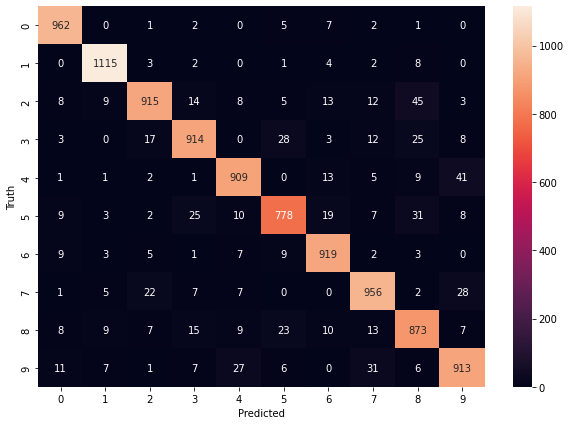

In [59]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
# using 1 hiddden layer
# converting 2d->1d directly
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2715 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0215 - accuracy: 0.9930


In [64]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9744


[0.08833619207143784, 0.974399983882904]